In [0]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Item Similarity Recommender System via Content-Filtering

In [0]:
ratings = pd.read_csv('https://raw.githubusercontent.com/warriorkitty/orientlens/master/movielens/ratings.csv')
movies = pd.read_csv('https://raw.githubusercontent.com/warriorkitty/orientlens/master/movielens/movies.csv')
tags = pd.read_csv('https://raw.githubusercontent.com/warriorkitty/orientlens/master/movielens/tags.csv')

In [54]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,5.0,847117005
1,1,2,3.0,847642142
2,1,10,3.0,847641896


In [55]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [56]:
tags.head(3)

,userId,movieId,tag,timestamp
0,6,4973,beautifully filmed,1242761120
1,6,4973,connection,1242761139
2,6,4973,fairy tale,1242761118


In [57]:
movie_ratings = pd.merge(ratings,movies,on='movieId')
movie_ratings.head(3)

,userId,movieId,rating,timestamp,title,genres
0,1,1,5.0,847117005,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,1,3.0,833971988,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,5,1,4.0,1040175819,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [58]:
#Movies with the highest ratings in descending order
movie_ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Ring of Bright Water (1969)    5.0
Two Deaths (1995)              5.0
Unbroken (2014)                5.0
Overnight (2003)               5.0
Pageant (2008)                 5.0
Name: rating, dtype: float64

In [59]:
#movies that have the most ratings
movie_ratings.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 333
Forrest Gump (1994)                 321
Shawshank Redemption, The (1994)    310
Jurassic Park (1993)                307
Silence of the Lambs, The (1991)    299
Name: rating, dtype: int64

In [60]:
ordered_ratings = pd.DataFrame(movie_ratings.groupby('title')['rating'].mean())
ordered_ratings['ratingsCount'] = pd.DataFrame(movie_ratings.groupby('title')['rating'].count())
ordered_ratings.head()

,rating,ratingsCount
title,,
"""Great Performances"" Cats (1998)",3.500000,2
'71 (2014),4.250000,2
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,2
"'burbs, The (1989)",3.111111,18


In [61]:
#Average Mean Rating
ordered_ratings['rating'].mean()

3.4106968094957195

In [62]:
ordered_ratings['ratingsCount'].mean()

11.245820711320542

In [63]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100234 entries, 0 to 100233
Data columns (total 6 columns):
userId       100234 non-null int64
movieId      100234 non-null int64
rating       100234 non-null float64
timestamp    100234 non-null int64
title        100234 non-null object
genres       100234 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


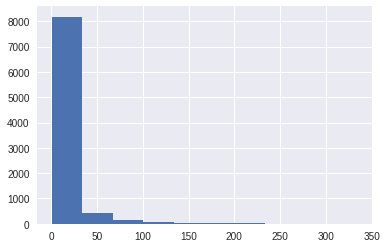

In [64]:
ordered_ratings['ratingsCount'].hist()

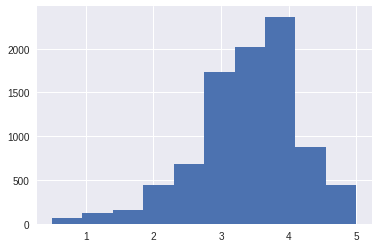

In [65]:
ordered_ratings['rating'].hist()

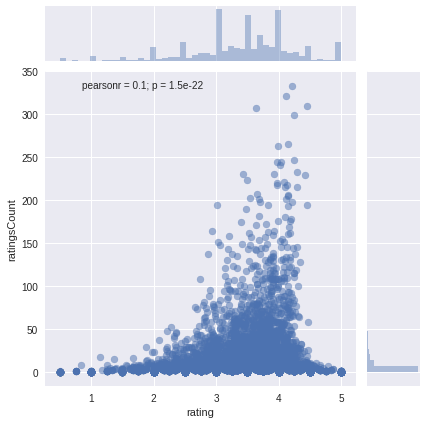

In [66]:
sns.jointplot(x='rating', y='ratingsCount',data=ordered_ratings, alpha=0.5)

In [67]:
moviemat = movie_ratings.pivot_table(index='userId', columns='title', values='rating')
moviemat.head()

title,"""Great Performances"" Cats (1998)",'71 (2014),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),...And Justice for All (1979),...,Zoolander (2001),Zoom (2006),"Zorro, the Gay Blade (1981)",Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,4.0,3.5,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
ordered_ratings.sort_values('ratingsCount', ascending=False).head(10)

,rating,ratingsCount
title,,
Pulp Fiction (1994),4.204204,333
Forrest Gump (1994),4.113707,321
"Shawshank Redemption, The (1994)",4.456452,310
Jurassic Park (1993),3.633550,307
"Silence of the Lambs, The (1991)",4.250836,299
Star Wars: Episode IV - A New Hope (1977),4.141509,265
Toy Story (1995),3.988593,263
"Matrix, The (1999)",4.238866,247
Braveheart (1995),4.028689,244


In [0]:
pulpfiction_user_ratings = moviemat['Pulp Fiction (1994)']
starwars4_user_ratings = moviemat['Star Wars: Episode IV - A New Hope (1977)']

In [70]:
starwars4_user_ratings.head()

userId
1    NaN
2    NaN
3    5.0
4    NaN
5    3.0
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

In [71]:
similar2pulp = moviemat.corrwith(pulpfiction_user_ratings)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [72]:
similar2starw4 = moviemat.corrwith(starwars4_user_ratings)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [73]:
clean_pulp = pd.DataFrame(similar2pulp, columns=['Correlation'])
clean_pulp.dropna(inplace=True)
clean_pulp.head()

,Correlation
title,
"'burbs, The (1989)",0.332344
(500) Days of Summer (2009),0.482869
*batteries not included (1987),0.251556
...And Justice for All (1979),0.155700
10 (1979),-0.866025


In [74]:
clean_pulp.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Au revoir les enfants (1987),1.0
Red Riding: 1980 (2009),1.0
Warm Bodies (2013),1.0
Louis C.K.: Live at The Comedy Store (2015),1.0
Louis C.K.: Oh My God (2013),1.0


In [75]:
clean_pulp = clean_pulp.join(ordered_ratings['ratingsCount'])
clean_pulp.head()

,Correlation,ratingsCount
title,,
"'burbs, The (1989)",0.332344,18
(500) Days of Summer (2009),0.482869,38
*batteries not included (1987),0.251556,13
...And Justice for All (1979),0.155700,9
10 (1979),-0.866025,5


In [76]:
#Filter movies with less that 120 ratings counted
clean_pulp[clean_pulp['ratingsCount']>120].sort_values('Correlation',ascending=False).head()

,Correlation,ratingsCount
title,,
Pulp Fiction (1994),1.000000,333
Reservoir Dogs (1992),0.710245,134
Kill Bill: Vol. 1 (2003),0.611276,121
Goodfellas (1990),0.587353,131
"Godfather: Part II, The (1974)",0.528095,128


Clean star wars and repeat the previous steps

In [77]:
clean_stars4 = pd.DataFrame(similar2starw4, columns=['Correlation'])
clean_stars4.dropna(inplace=True)
clean_stars4 = clean_stars4.join(ordered_ratings['ratingsCount'])
clean_stars4.head()

,Correlation,ratingsCount
title,,
"'burbs, The (1989)",0.223963,18
'night Mother (1986),1.000000,4
(500) Days of Summer (2009),-0.037425,38
*batteries not included (1987),0.303738,13
...And Justice for All (1979),-0.158035,9


In [78]:
#Filter movies with less that 120 ratings counted
clean_stars4[clean_stars4['ratingsCount']>120].sort_values('Correlation',ascending=False).head()

,Correlation,ratingsCount
title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,265
Star Wars: Episode V - The Empire Strikes Back (1980),0.829431,218
Star Wars: Episode VI - Return of the Jedi (1983),0.732407,218
Alien (1979),0.510263,161
Star Wars: Episode I - The Phantom Menace (1999),0.492360,137


#Popularity-based recommendation system
with turicreate

In [0]:
!pip install turicreate

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
train_data, test_data = train_test_split(movie_ratings, test_size = 0.20, random_state=100)

In [0]:
from turicreate import SFrame
rec_train_data = turicreate.SFrame(train_data)
rec_test_data = turicreate.SFrame(test_data)

In [0]:
#train_plot = turicreate.visualization.columnwise_summary(rec_train_data)
rec_train_data.plot()

In [0]:
test_data.shape

In [0]:
from turicreate import popularity_recommender as pr

In [85]:
popular_movie_model = pr.create(rec_train_data, user_id='userId', item_id='title',target='rating')

Warning: Ignoring columns movieId, timestamp, genres;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80187 observations with 718 users and 8303 items.

Data prepared in: 0.131569s

80187 observations to process; with 8303 unique items.

In [0]:
#Predictions
pop_movie_recom = popular_movie_model.recommend(users=rec_train_data['userId'][1:5], k=5)

In [0]:
pop_movie_recom.print_rows(num_rows=20)

In [95]:
metrics = popular_movie_model.evaluate(rec_test_data)
print(metrics)


Precision and recall summary statistics by cutoff
+--------+------------------------+-----------------------+
| cutoff |     mean_precision     |      mean_recall      |
+--------+------------------------+-----------------------+
|   1    |          0.0           |          0.0          |
|   2    |          0.0           |          0.0          |
|   3    | 0.0004649000464900048  | 3.401707657243939e-05 |
|   4    | 0.0003486750348675036  | 3.401707657243939e-05 |
|   5    |  0.000278940027894003  | 3.401707657243939e-05 |
|   6    | 0.0002324500232450024  | 3.401707657243939e-05 |
|   7    | 0.00019924287706714482 | 3.401707657243939e-05 |
|   8    | 0.0003486750348675036  | 4.008099022230895e-05 |
|   9    |  0.00030993336432667   | 4.008099022230895e-05 |
|   10   | 0.0002789400278940029  | 4.008099022230895e-05 |
+--------+------------------------+-----------------------+
[10 rows x 3 columns]


Overall RMSE: 0.9939304673730257

Per User RMSE (best)
+--------+--------------------

# Now build the collaborative filtering model

In [91]:
#Training the model
movie_sim_model = turicreate.item_similarity_recommender.create(rec_train_data, 
                                                                user_id='userId', item_id='title',target='rating', similarity_type='cosine')

Warning: Ignoring columns movieId, timestamp, genres;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80187 observations with 718 users and 8303 items.

Data prepared in: 0.139556s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 16.237ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 177.296ms                           | 0.25             | 36              |

| 1.45s                               | 100              | 8303            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.49035s

In [0]:
#Make Recommendations
movie_sim_recom = movie_sim_model.recommend(users=rec_train_data['userId'][1:5], k=5)

In [96]:
#accuracy
collab_accuracy = movie_sim_model.evaluate(rec_test_data)
print(collab_accuracy)


Precision and recall summary statistics by cutoff
+--------+---------------------+-----------------------+
| cutoff |    mean_precision   |      mean_recall      |
+--------+---------------------+-----------------------+
|   1    | 0.09762900976290094 | 0.0029753095515140473 |
|   2    | 0.09762900976290101 |  0.006606198899138411 |
|   3    | 0.09809390980939103 |  0.009807776128747113 |
|   4    | 0.10390516039051598 |  0.01614062509353581  |
|   5    | 0.10962343096234299 |  0.02396001451269512  |
|   6    | 0.11715481171548117 |  0.03267073433098716  |
|   7    |  0.1203426977485554 |  0.04065528378853259  |
|   8    | 0.12587168758716896 |  0.05052587875324419  |
|   9    | 0.12598791259879139 |  0.057727837005854696 |
|   10   | 0.12859135285913523 |  0.06651073157830746  |
+--------+---------------------+-----------------------+
[10 rows x 3 columns]


Overall RMSE: 3.6410924062307277

Per User RMSE (best)
+--------+--------------------+-------+
| userId |        rmse        | 

In [0]:
similar_predictions = movie_sim_model.predict(rec_train_data, new_observation_data=rec_test_data)

In [98]:
similar_predictions

dtype: float
Rows: 80187
[0.007794629181585004, 0.016940714440866207, 0.1092294454574585, 0.004343317426056082, 0.39027856056179316, 0.29388585918909543, 0.05950255110150292, 0.16987152093959645, 0.016811454217339403, 0.07552294284105301, 0.135830629320823, 0.029462302916616365, 0.08229117395182169, 0.18035864651203157, 0.4921067516978194, 0.010577190531431323, 0.12624402948327967, 0.21761891542452771, 0.45560600199894596, 0.2693468748914952, 0.23840888908931188, 0.1126752493920341, 0.03652732300035881, 0.3600356310999866, 0.08565978221479953, 0.046042624440959995, 0.2007622858895684, 0.3888584825125608, 0.13010721294968217, 0.11938462634160729, 0.0, 0.02360176295042038, 0.035342857241630554, 0.01572515412363047, 0.4461169167170449, 0.14830567420107646, 0.02596462848623829, 0.05929022455363082, 1.031195014192347, 0.1946916427026248, 0.053851360888094515, 0.040135894208786195, 0.08253274722532793, 0.16657401945279993, 0.24600535495096146, 0.5798797911786019, 0.33264874653382737, 0.73792

In [0]:
plt.plot(similar_predictions)

In [102]:
movie_sim_recom.print_rows(num_rows=20)

+--------+-------------------------------+----------------------+------+
| userId |             title             |        score         | rank |
+--------+-------------------------------+----------------------+------+
|  438   |   Back to the Future (1985)   | 0.054988968934984686 |  1   |
|  438   |      Wayne's World (1992)     | 0.046466395865499444 |  2   |
|  438   |        Gladiator (2000)       | 0.04390030705471658  |  3   |
|  438   |        Senseless (1998)       | 0.04282965911524837  |  4   |
|  438   |        Incognito (1997)       | 0.04254041890830768  |  5   |
|  102   |   Back to the Future (1985)   | 0.37318513354102334  |  1   |
|  102   | Raiders of the Lost Ark (I... |  0.3233452753706293  |  2   |
|  102   |          Alien (1979)         |  0.320072156387371   |  3   |
|  102   | Star Wars: Episode V - The... |  0.3062191802066761  |  4   |
|  102   |      Groundhog Day (1993)     | 0.29919809103012085  |  5   |
|  526   |        Die Hard (1988)        | 0.153111

In [0]:
turicreate.evaluation.accuracy(rec_test_data['movieId'],similar_predictions, average='micro')

In [105]:
hist = turicreate.visualization.histogram(similar_predictions)
hist

Materializing SArray

# Matrix Factorisation

In [0]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
          np.random.shuffle(self.samples)
          self.sgd()
          mse = self.mse()
          training_process.append((i, mse))
        if (i+1) % 20 == 0:
            print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and movie j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)
    
    

In [0]:
R= np.array(movie_ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0))

In [0]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

In [0]:
mf.mse()

In [0]:
np.sqrt(mf.mse())